# EDA - Dataset top100 spotify 2010-2019

o link do dataset no kaggle: https://www.kaggle.com/datasets/muhmores/spotify-top-100-songs-of-20152019

O dataset possui os nomes dos artitas, titulos das musicas, genero, ano e dia de lançamento, o ano que foi top hit, dentre outras informações sobre a música.  

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Carregando e tratando os dados

In [2]:
df = pd.read_csv('spotify_2010-2019_Top_100.csv')
df.head()

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009.0,2022‑02‑17,140.0,81.0,61.0,-6.0,23.0,23.0,203.0,0.0,6.0,70.0,2010.0,Duo
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010.0,2022‑02‑17,138.0,89.0,68.0,-4.0,36.0,83.0,192.0,1.0,8.0,68.0,2010.0,Duo
2,I Need A Dollar,Aloe Blacc,pop soul,2010.0,2022‑02‑17,95.0,48.0,84.0,-7.0,9.0,96.0,243.0,20.0,3.0,72.0,2010.0,Solo
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010.0,2022‑02‑17,93.0,87.0,66.0,-4.0,4.0,38.0,180.0,11.0,12.0,80.0,2010.0,Solo
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010.0,2022‑02‑17,104.0,85.0,69.0,-6.0,9.0,74.0,268.0,39.0,5.0,79.0,2010.0,Solo


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          1000 non-null   object 
 1   artist         1000 non-null   object 
 2   top genre      1000 non-null   object 
 3   year released  1000 non-null   float64
 4   added          1000 non-null   object 
 5   bpm            1000 non-null   float64
 6   nrgy           1000 non-null   float64
 7   dnce           1000 non-null   float64
 8   dB             1000 non-null   float64
 9   live           1000 non-null   float64
 10  val            1000 non-null   float64
 11  dur            1000 non-null   float64
 12  acous          1000 non-null   float64
 13  spch           1000 non-null   float64
 14  pop            1000 non-null   float64
 15  top year       1000 non-null   float64
 16  artist type    1000 non-null   object 
dtypes: float64(12), object(5)
memory usage: 133.3+ KB


In [4]:
df.isna().sum()

title            3
artist           3
top genre        3
year released    3
added            3
bpm              3
nrgy             3
dnce             3
dB               3
live             3
val              3
dur              3
acous            3
spch             3
pop              3
top year         3
artist type      3
dtype: int64

Aqui podemos observar que o dataset possui 3 instancias NA para todas as colunas.

In [5]:
df.tail(4)

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
999,The London (feat. J. Cole & Travis Scott),Young Thug,atl hip hop,2019.0,2020‑06‑22,98.0,59.0,80.0,-7.0,13.0,18.0,200.0,2.0,15.0,75.0,2019.0,Solo
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Analisando o dataset foi encontrado que as ultimas 3 instancias estão vazias. Logo, podemos usar o dropna() para tirar elas e ficar com o dataset completo com 1000 instancias.

In [6]:
df.dropna(inplace=True)
df.isna().sum()

title            0
artist           0
top genre        0
year released    0
added            0
bpm              0
nrgy             0
dnce             0
dB               0
live             0
val              0
dur              0
acous            0
spch             0
pop              0
top year         0
artist type      0
dtype: int64

## Transformar 'top year' e 'year released' para int64

In [7]:
df['year released'] = df['year released'].astype('int64')
df['top year'] = df['top year'].astype('int64')

Agora vamos ver quais os valores de anos estão presentes no dataset, se realmente é de 2010 a 2019 e suas datas de lançamentos

In [8]:
df['top year'].value_counts()

2010    100
2011    100
2012    100
2013    100
2014    100
2015    100
2016    100
2017    100
2018    100
2019    100
Name: top year, dtype: int64

In [9]:
df['year released'].value_counts()

2018    112
2012    109
2014    101
2017     99
2015     99
2010     94
2011     93
2019     87
2013     86
2016     86
2009     24
2020      6
2021      3
1975      1
Name: year released, dtype: int64

### Como temos dados um pouco estranhos, lançado em 1975,  2021 e 2020, precisamos olhar esses dados e tratar

In [10]:
# prara ajustar as datas erradas foi criada essa função
def ajYR(title, new_year):
    for i in range(len(df)):
        if df.loc[i, 'title'] == title:
            df.loc[i, 'year released'] = new_year
    return 

In [11]:
df[df['year released']==1975]

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
982,Bohemian Rhapsody - Remastered 2011,Queen,classic rock,1975,2020‑06‑22,144.0,40.0,39.0,-10.0,24.0,23.0,354.0,29.0,5.0,77.0,2019,Band/Group


In [12]:
df[df['year released']==2021]

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
168,I Follow Rivers - The Magician Remix,Lykke Li,art pop,2021,2020‑06‑25,122.0,70.0,79.0,-6.0,8.0,30.0,280.0,2.0,4.0,67.0,2011,Solo
182,Read All About It,Professor Green,grime,2021,2020‑06‑16,101.0,75.0,66.0,-6.0,22.0,45.0,236.0,34.0,4.0,35.0,2011,Solo
608,Hurts So Good,Astrid S,alt z,2021,2020‑06‑08,120.0,63.0,67.0,-5.0,9.0,42.0,209.0,8.0,5.0,77.0,2016,Solo


In [13]:
df[df['year released']==2020]

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
69,Eenie Meenie,Sean Kingston,dance pop,2020,2022‑02‑17,121.0,64.0,73.0,-3.0,10.0,84.0,202.0,3.0,3.0,72.0,2010,Solo
98,We No Speak Americano (Edit),Yolanda Be Cool,australian dance,2020,2022‑02‑17,125.0,81.0,90.0,-5.0,9.0,75.0,157.0,7.0,5.0,65.0,2010,Duo
651,Gold,Kiiara,alt z,2020,2020‑06‑08,113.0,41.0,60.0,-9.0,13.0,41.0,226.0,62.0,34.0,64.0,2016,Solo
901,Easier,5 Seconds of Summer,boy band,2020,2020‑06‑22,176.0,46.0,56.0,-4.0,11.0,62.0,158.0,48.0,26.0,74.0,2019,Band/Group
951,i'm so tired...,Lauv,dance pop,2020,2020‑06‑22,102.0,73.0,60.0,-7.0,24.0,53.0,163.0,18.0,20.0,81.0,2019,Solo
972,Options,NSG,afro dancehall,2020,2020‑08‑20,102.0,62.0,84.0,-5.0,10.0,76.0,240.0,39.0,9.0,62.0,2019,Band/Group


In [14]:
ajYR('Bohemian Rhapsody - Remastered 2011', 2011)
ajYR('I Follow Rivers - The Magician Remix', 2011)
ajYR('Read All About It', 2011)
ajYR('Hurts So Good', 2016)
ajYR('Eenie Meenie', 2010)
ajYR('We No Speak Americano (Edit)', 2010)
ajYR('Gold', 2015)
ajYR('Easier', 2019)
ajYR("i'm so tired...", 2019)
ajYR('Options', 2019)

# Análise dos dados

Logo de cara a primeira coisa que podemos procurar é: Quais os artitas que mais ficaram no top 100 nesses 9 anos ?

In [15]:
df[['artist','top genre']].value_counts().head(10)

artist         top genre       
Taylor Swift   pop                 21
Calvin Harris  dance pop           18
Drake          canadian hip hop    18
Rihanna        barbadian pop       14
Ariana Grande  dance pop           14
Bruno Mars     dance pop           13
Maroon 5       pop                 11
Chris Brown    dance pop           10
Jason Derulo   dance pop           10
Ed Sheeran     pop                 10
dtype: int64

Taylor swift foi a artista que mais apareceu no top 100, seguida de Drake, Calvin Harris, Rihanna e Ariana Grande. Podemos observar ainda que os gêneros musicais desses artitas são quase todos algum tipo de musica POP e HIP HOP.

#### Dos generos quais os que mais aparecem no top 100 ?

O gráfico abaixo apresenta os 15 gêneros que mais aparecem no top 100. Com isso, conseguimos observar que disparadamente o genero que mais mais sucesso é o dance pop. Além do mais, vemos que a maior parte deles são musicas pop ou hip hop.

<AxesSubplot:>

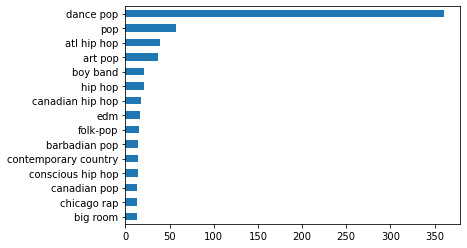

In [16]:
df['top genre'].value_counts().head(15).sort_values().plot.barh()

### Nos ultimos 4 anos quais os gêneros que mais estavam no top 100 ?

<AxesSubplot:title={'center':'Top 2019'}>

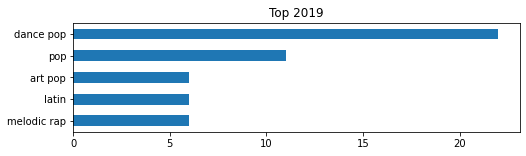

In [17]:
fig = plt.figure(figsize=(8,2))
df[df['top year'] == 2019]['top genre'].value_counts().head(5).sort_values().plot.barh(title='Top 2019')

<AxesSubplot:title={'center':'Top 2018'}>

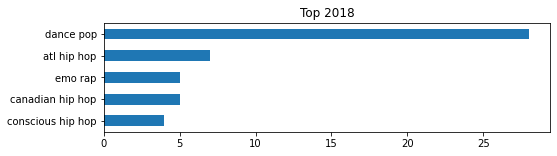

In [18]:
fig = plt.figure(figsize=(8,2))
df[df['top year'] == 2018]['top genre'].value_counts().head(5).sort_values().plot.barh(title='Top 2018')

<AxesSubplot:title={'center':'Top 2017'}>

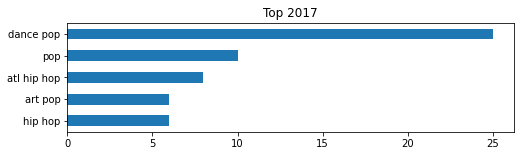

In [19]:
fig = plt.figure(figsize=(8,2))
df[df['top year'] == 2017]['top genre'].value_counts().head(5).sort_values().plot.barh(title='Top 2017')

<AxesSubplot:title={'center':'Top 2016'}>

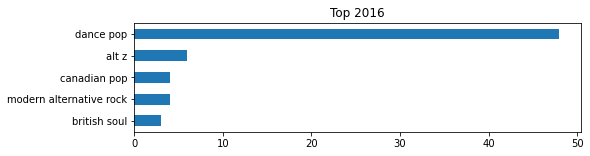

In [20]:
fig = plt.figure(figsize=(8,2))
df[df['top year'] == 2016]['top genre'].value_counts().head(5).sort_values().plot.barh(title='Top 2016')

É com uma grande margem de diferença que o DANCE POP todo ano fica como o gênero que mais aparece no top 100. 

No gráfico foram mostrados apenas os ultimos quatro anos (2019, 2018, 2017, 2016), vemos que o POP sempre é o mais tocado e o hip hop alternativo aparece em 2018 (2º) e 2017 (3º).

Uma coisa interessante para observar é que mesmo tem alguns gêneros bastante especificos, como o pop e hip hop canadense.

In [21]:
print(df[df['top genre'] == 'canadian pop']['artist'].value_counts())
print('')
print(df[df['top genre'] == 'canadian hip hop']['artist'].value_counts())

Justin Bieber       6
Shawn Mendes        4
Avril Lavigne       2
Carly Rae Jepsen    1
Name: artist, dtype: int64

Drake    18
Name: artist, dtype: int64


Quando análisamos esses dados vemos que os artistas de pop canadense possuem 13 faixas, em sua maior parte de Justin Bieber ou Shawn Mendes. Entretanto, quando olhamos para o hip hop canadense vemos que Drake sozinho tem 18 músicas nos top 100 e em 2018 foi responsavel por colocar esse gênero entre os 5 maiores.

Dentre todos os artistas do dataset a maioria deles se tratam de artistas solos.

<AxesSubplot:title={'center':'Tipo do artista'}>

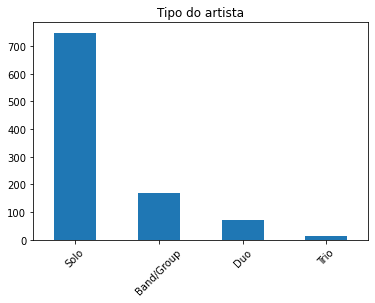

In [22]:
df['artist type'].value_counts().plot.bar(title='Tipo do artista', rot=45)

## A musica que tem menor a maior batidas por minuto (BPM):

são de Justin Bieber e XXXTENTACION, Blake Shelton	e Rihanna, respectivamente.

In [23]:
print('BPM menor: ',df['bpm'].sort_values().min())
print('BPM maior: ',df['bpm'].sort_values().max())

BPM menor:  65.0
BPM maior:  206.0


In [24]:
df.query('bpm == 65.0')[['artist','title']]

,artist,title
38,Justin Bieber,Baby
896,XXXTENTACION,changes


In [25]:
df.query('bpm == 206.0')[['artist','title']]

,artist,title
109,Blake Shelton,Honey Bee
563,Rihanna,FourFiveSeconds


## A música mais energética:

In [26]:
print(df['nrgy'].sort_values().max())
print(df['dnce'].sort_values().max())

98.0
96.0


In [27]:
print('As musicas mais energetica: \n',df.query('nrgy == 98.0')[['artist','title','top genre']])

As musicas mais energetica: 
             artist            title    top genre
70   Sidney Samson        Riverside  dutch house
312  Bingo Players  Get Up (Rattle)     big room


In [28]:
print('As musicas mais faceis de dançar: \n',df.query('dnce == 96.0')[['artist','title','top genre']])

As musicas mais faceis de dançar: 
           artist       title    top genre
461  Nicki Minaj    Anaconda    dance pop
856     Lil Baby  Yes Indeed  atl hip hop


Com isso vemos que, as musicas mais energeticas são musicas eletrônicas o que explica elas serem as mais energeticas. Logo, temos Anaconda de Nicki Minaj como uma das mais fáceis de dançar junto com Lil Baby, duas músicas que ficaram bastantes conhecidas devido aos videos de dança na internet.

# Conclusões

Como conclusões da análise deste dataset temos:
1. Taylor Swift como a artista que mais ficou no top 100 de 2010 a 2019, onde tiveram 21 músicas dela;
2. Dance Pop é o gênero de música que mais está no top 100 dos ultimos 4 anos, além de que, outros gêneros derivados do pop estão sempre entre os 5 maiores;
3. Drake é o artista que sozinho conseguiu colocar um gênero musical entre os 5 maiores do top 100 daquele ano;
4. A maioria dos artistas são de carreira solo;
5. As musicas mais lentas e rápidas são de Justin Bieber e XXXTENTACION, Blake Shelton e Rihanna, respectivamente;
6. As musicas mais energeticas são de Sidney Samson e Bingo Players;
7. As musicas mais fáceis de dançar são de Nicki Minaj e Lil Baby.